In [42]:
import assignment1 as a1
import utilities as utl
import scipy
import numpy as np
import matplotlib.pyplot as plt

from utilities import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
(countries, features, values) = a1.load_unicef_data()

targets = values[:,1]
x = values[:,7:]
x = a1.normalize_data(x)

N_TRAIN = 100
x_train = x[0:N_TRAIN, :]
t_train = targets[0:N_TRAIN]
x_test = x[N_TRAIN:, :]
t_test = targets[N_TRAIN:]

u = (100, 10000)
s = 2000.0
r = (0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000)

3.9 133.2
3.9 130.4
3.9 107.8
4.0 47.0
5.4 53.9
7.9 45.1
13.2 28.4
24.4 28.0
44.2 43.6


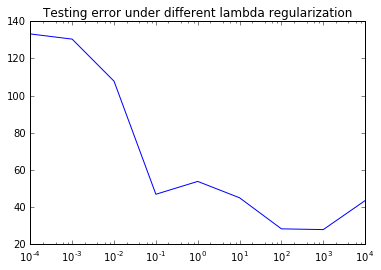

In [44]:
err_test_count = []
err_train_count = []
for temp_lambda in r:

    sta_pos = [it * 10 for it in range(10)]
    end_pos = [it * 10 for it in range(11)][1:]

    err_test_collection = np.array([0] * 10)
    err_train_collection = np.array([0] * 10)

    for idx in xrange(10):
        s1 = sta_pos[idx % 10]
        e1 = end_pos[idx % 10]
        s2 = sta_pos[(idx+1) % 10]
        e2 = end_pos[(idx+1) % 10]
        # print s1, e1, s2, e2
        new_x_train = np.concatenate((x_train[:s2], x_train[e2:]), axis=0)
        new_t_train = np.concatenate((t_train[:s2], t_train[e2:]), axis=0)
        new_x_test = x_train[s2:e2]
        new_t_test = t_train[s2:e2]
        # with regularization
        w, err_train, err_test = polynomial_regression_with_regularization( \
                            temp_lambda, new_x_train, new_t_train, new_x_test, new_t_test, degree=2)

        err_test_collection[idx] = err_test
        err_train_collection[idx] = err_train
    
    err_test_count.append(np.average(err_test_collection))
    err_train_count.append(np.average(err_train_collection))

    print np.mean(err_train_collection), np.mean(err_test_collection)
    

plt.semilogx(r, err_test_count)
plt.title('Testing error under different lambda regularization')
plt.show()

In [37]:
err_test_count

[35.399999999999999,
 35.399999999999999,
 35.399999999999999,
 35.399999999999999,
 35.0,
 33.600000000000001,
 32.799999999999997,
 44.5,
 55.5]